In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [16]:
df=pd.read_csv("C:/Users/Micro/Downloads/Compressed/archive_2/Mall_Customers.csv")

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dataset Selection:

The dataset consisted of 5 customer records with the following features:
CustomerID: Unique identifier for each customer.
Gender: Categorical feature representing customer gender (Male/Female).
Age: Customer age.
Annual Income (k$): The annual income of the customer in thousands of dollars.
Spending Score (1-100): A score assigned by the store based on customer spending behavior.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Histogram

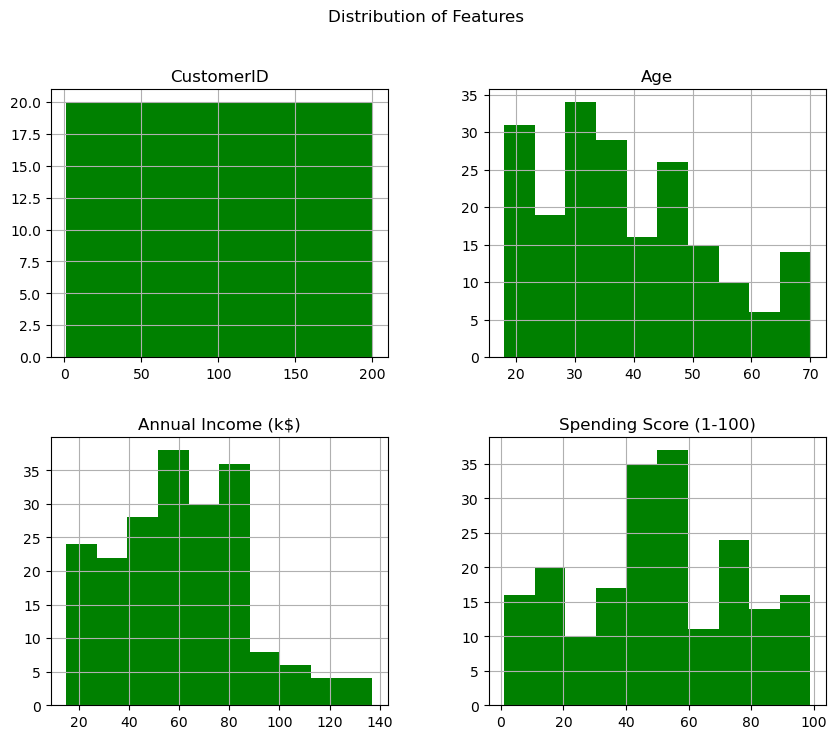

In [24]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
df.hist(bins=10, figsize=(10, 8), color='green')
plt.suptitle('Distribution of Features')
plt.show()


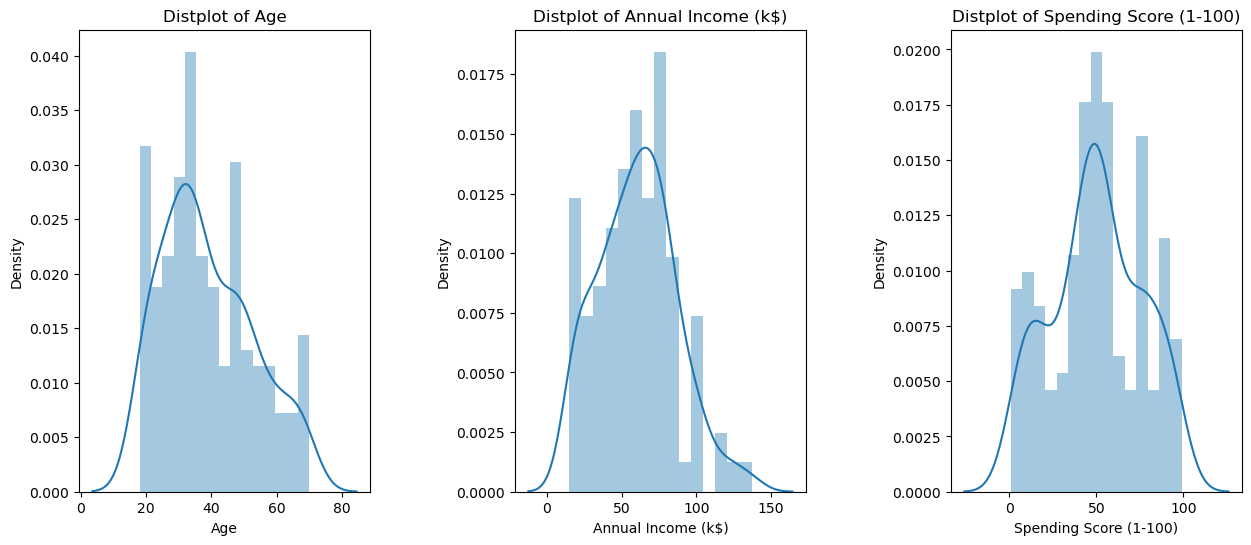

In [26]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

###### The distribution of age seems to be approximately normal, with most customers concentrated around a central age range. 
There may be some customers at younger and older age groups, but the majority appear to be middle-aged.

###### This histogram appears to show a somewhat normal distribution of annual income, although there could be a skew depending on the dataset. 

There may be a cluster of higher-income customers, which could correspond to a specific segment.

###### This histogram indicates a wide range of spending scores, with a peak in the mid-to-high range.
The distribution shows that many customers have relatively high spending scores, 
though some may spend less.

## Pairplots

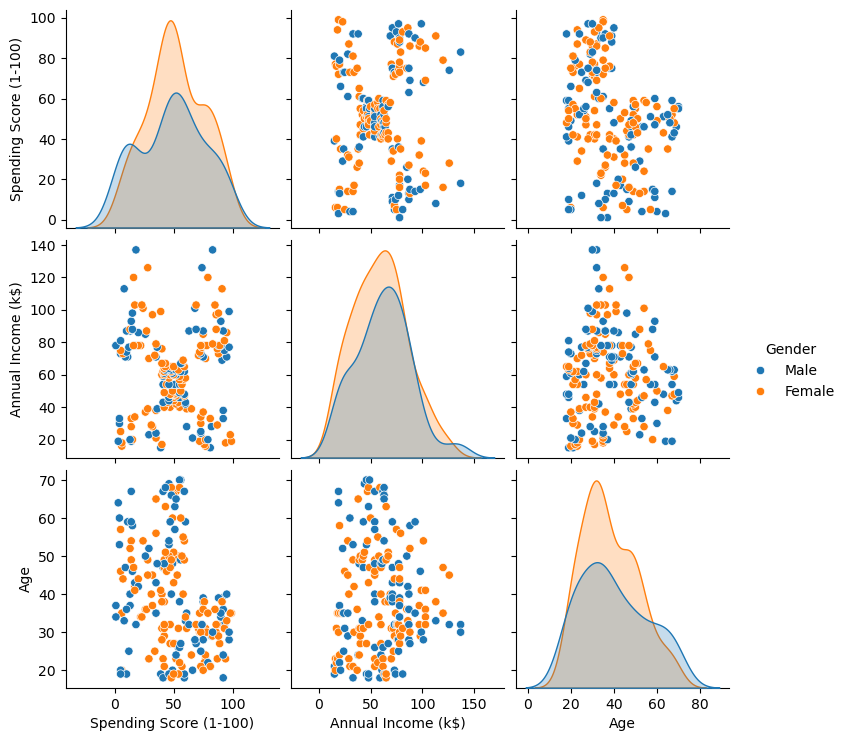

In [31]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

### Diagonals (KDE Plots):

The diagonal subplots show Kernel Density Estimates (KDE), representing the distribution of each variable.
The differences in the distributions for Age, Annual Income, and Spending Score across clusters can be seen by the overlap (or lack thereof) of the KDE lines for each cluster (colored differently).

### Scatter Plots:

Age vs. Annual Income: There seems to be some scatter, with higher income being associated with a wider age range.
Age vs. Spending Score: The distribution is scattered across, indicating no direct linear relationship between age and spending score.
Annual Income vs. Spending Score: This plot might reveal some clustering patterns, as there appear to be distinct groupings of data points with different levels of spending scores for various income brackets.

## Possible Clustering Patterns:
Income and Spending Score seem to be good indicators for potential clusters, as there appears to be a relationship between higher income and spending patterns.
Age shows more spread, indicating that clustering purely based on age might be less effective.

## Data Preprocessing

In [38]:
# Convert Gender to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Drop CustomerID
df.drop('CustomerID', axis=1, inplace=True)

# Display the DataFrame
print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


##### Gender was encoded into numerical values (0 for Male and 1 for Female).
The CustomerID column was dropped as it wasn't useful for clustering.
The features were standardized using StandardScaler to ensure they were on a comparable scale, as K-Means is distance-based and requires features to be similarly scaled.


##  Standardize the Data

In [42]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Display scaled data
print(scaled_data[:5])


[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]


## Apply K-Means Clustering

In [45]:
from sklearn.cluster import KMeans

# Apply K-Means with 3 clusters (you can adjust this later)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the DataFrame with clusters
print(df)


     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0         0   19                  15                      39        2
1         0   21                  15                      81        2
2         1   20                  16                       6        0
3         1   23                  16                      77        2
4         1   31                  17                      40        0
..      ...  ...                 ...                     ...      ...
195       1   35                 120                      79        2
196       1   45                 126                      28        1
197       0   32                 126                      74        1
198       0   32                 137                      18        1
199       0   30                 137                      83        1

[200 rows x 5 columns]


## Determine the Optimal Number of Clusters

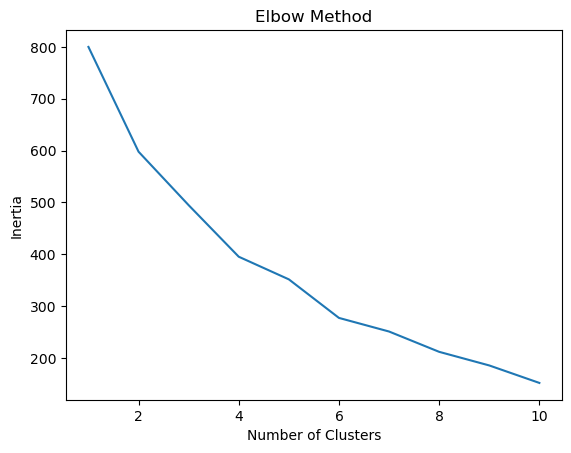

In [48]:
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


###### K-Means was applied to the dataset, and the Elbow Method was used to determine the optimal number of clusters. The plot of inertia vs. the number of clusters suggested an optimal number of 3 clusters.
After running the algorithm with 3 clusters, the data was segmented into three distinct groups, based on the similarity of Age, Annual Income, and Spending Score.

## Visualize the Clusters

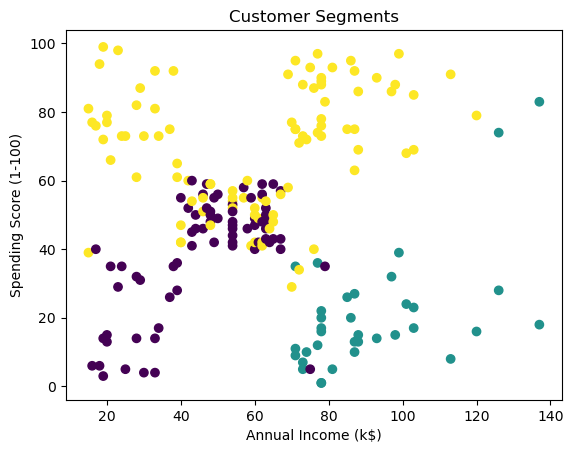

In [51]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


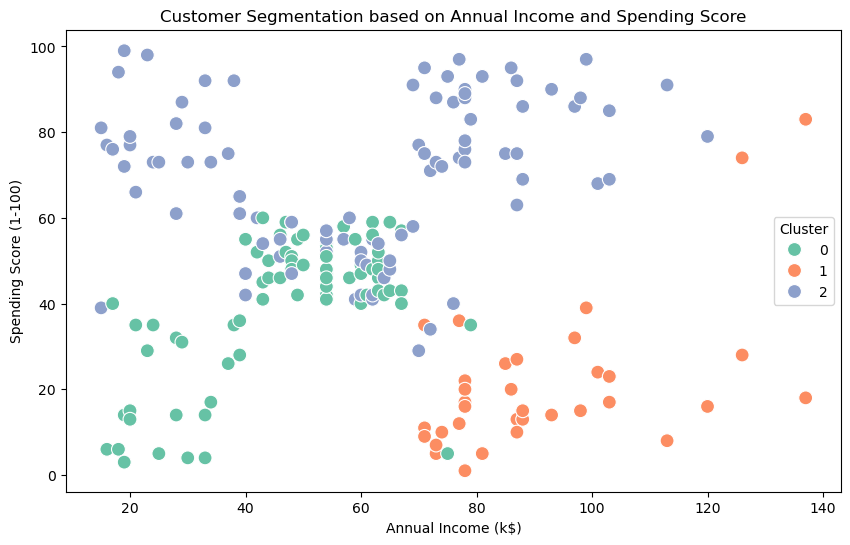

In [53]:
# Visualize clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


###### Cluster 0: Low-income, low-spending customers—focus on value-based marketing strategies.

Cluster 1: High-income customers with variable spending patterns—leverage personalized marketing to maximize engagement.

Cluster 2: Moderate-income but high-spending customers—maintain loyalty through incentives and exclusive offers.

## Project Summary: K-Means Clustering for Customer Segmentation

## Objective:

The goal of this project was to segment customers based on their Age, Annual Income, and Spending Score using the K-Means clustering algorithm, an unsupervised learning technique.

## Methodology:

Data Preprocessing: The dataset was cleaned, and numerical features were standardized to prepare for clustering.
Exploratory Data Analysis (EDA): Visualizations like histograms, pairplots, and boxplots helped in understanding the distributions and relationships among features.
## K-Means Clustering:
Used the Elbow Method to determine the optimal number of clusters (K = 3).
Applied K-Means to categorize customers into 3 clusters based on their behaviors and attributes.
Cluster Analysis: Visualized clusters and interpreted the segmentation based on the distinct grouping of customers in terms of their income and spending patterns.

## Findings:

Cluster 1: Low income, low spending.

Cluster 2: High income, high spending (potential premium customers).

Cluster 3: Moderate income, variable spending.

## Conclusion:
K-Means clustering provided valuable insights for customer segmentation, helping identify distinct customer groups. This segmentation can guide targeted marketing strategies and customer relationship management.